In [145]:
import tensorflow as tf
from tensorflow.keras import losses, optimizers, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNet


import numpy as np
import cv2
import matplotlib.pyplot as plt
import os


BASE_DIR = '/kaggle/input/100-bird-species/180'
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VALIDATION_DIR = os.path.join(BASE_DIR, 'valid')
TEST_DIR = os.path.join(BASE_DIR, 'test')
CATEGORIES = os.listdir(TRAIN_DIR)

In [184]:
train_data = ImageDataGenerator(
    rescale=1./255,
).flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
)

validation_data = ImageDataGenerator(
    rescale=1./255,
).flow_from_directory(
    VALIDATION_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)

test_data = ImageDataGenerator(
    rescale=1./255,
).flow_from_directory(
    VALIDATION_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)

Found 24497 images belonging to 180 classes.
Found 900 images belonging to 180 classes.
Found 900 images belonging to 180 classes.


In [3]:
conv_base = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_base.trainable = False

model = tf.keras.models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation=tf.nn.relu))
model.add(layers.Dense(len(CATEGORIES), activation=tf.nn.softmax))

model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.categorical_crossentropy,
    metrics=['accuracy'],
)

17227776/17225924 [==============================] - 1s 0us/step


In [4]:
history = model.fit_generator(
    train_data,
    steps_per_epoch=280,
    validation_data=validation_data,
    validation_steps=14,
    epochs=40,
)

Train for 280 steps, validate for 14 steps
Epoch 1/40
280/280 [==============================] - 81s 291ms/step - loss: 6.4759 - accuracy: 0.0446 - val_loss: 4.4780 - val_accuracy: 0.0781
Epoch 2/40
280/280 [==============================] - 58s 206ms/step - loss: 4.9273 - accuracy: 0.1405 - val_loss: 3.8709 - val_accuracy: 0.1674
Epoch 3/40
280/280 [==============================] - 53s 188ms/step - loss: 3.1887 - accuracy: 0.3108 - val_loss: 2.7508 - val_accuracy: 0.3594
Epoch 4/40
280/280 [==============================] - 48s 170ms/step - loss: 2.0536 - accuracy: 0.5323 - val_loss: 2.3544 - val_accuracy: 0.5580
Epoch 5/40
280/280 [==============================] - 50s 180ms/step - loss: 1.4052 - accuracy: 0.6800 - val_loss: 2.1499 - val_accuracy: 0.5670
Epoch 6/40
280/280 [==============================] - 51s 181ms/step - loss: 1.0073 - accuracy: 0.7677 - val_loss: 2.9265 - val_accuracy: 0.5871
Epoch 7/40
280/280 [==============================] - 47s 166ms/step - loss: 0.7600 - a

900/900 [==============================] - 1s 1ms/sample - loss: 248.5204 - accuracy: 0.0000e+00
Accuracy:  0.0 %


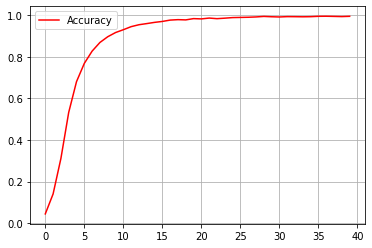

In [152]:
_, accuracy = model.evaluate_generator(test_data)

print('Accuracy: ', round(accuracy * 100, 2), '%')

plt.plot(history.history['accuracy'], 'r-', label='Accuracy')
plt.legend()
plt.grid()

plt.show()